# Census Income Project

# Problem Statement:



This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 
%matplotlib inline

In [18]:
income_df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
income_df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [19]:
income_df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [20]:
income_df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [21]:
income_df.Age = income_df.Age.astype(float)
income_df['Hours_per_week'] = income_df['Hours_per_week'].astype(float)


In [23]:
my_df = income_df.dropna()

In [24]:
my_df['Predclass'] = my_df['Income']
del my_df['Income']
my_df['Education_num'] = my_df['Education_num']
del my_df['Education_num']

In [25]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32560 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             32560 non-null  float64
 1   Workclass       32560 non-null  object 
 2   Fnlwgt          32560 non-null  int64  
 3   Education       32560 non-null  object 
 4   Marital_status  32560 non-null  object 
 5   Occupation      32560 non-null  object 
 6   Relationship    32560 non-null  object 
 7   Race            32560 non-null  object 
 8   Sex             32560 non-null  object 
 9   Capital_gain    32560 non-null  int64  
 10  Capital_loss    32560 non-null  int64  
 11  Hours_per_week  32560 non-null  float64
 12  Native_country  32560 non-null  object 
 13  Predclass       32560 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 3.7+ MB


In [26]:
my_df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Predclass         0
dtype: int64

In [30]:
print('Workclass',my_df.Workclass.unique())
print('Education',my_df.Education.unique())
print('Marital_status',my_df['Marital_status'].unique())
print('Occupation',my_df.Occupation.unique())
print('Relationship',my_df.Relationship.unique())
print('Race',my_df.Race.unique())
print('Native_country',my_df['Native_country'].unique())
print('Predclass',my_df.Predclass.unique())

Workclass [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Marital_status [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
Occupation [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing' ' Machine-op-inspct'
 ' Tech-support' ' ?' ' Protective-serv' ' Armed-Forces'
 ' Priv-house-serv']
Relationship [' Husband' ' Not-in-family' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
Race [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
Native_country [' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'


In [ ]:
#my_df.loc[income_df['Predclass'] == ' >50K','Predclass'] = 1
#my_df.loc[income_df['Predclass'] == ' <=50K','Predclass'] = 0 

In [ ]:
#predclass1 = my_df[my_df['predclass'] == 1]
#predclass0 = my_df[my_df['predclass'] == 0]

<AxesSubplot:xlabel='count', ylabel='Predclass'>

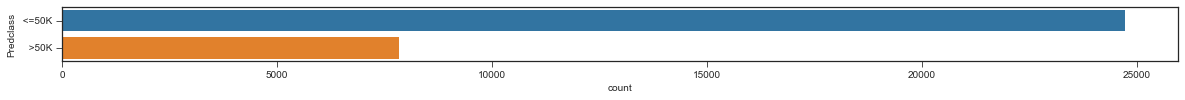

In [34]:
fig = plt.figure(figsize=(20,1))
plt.style.use('seaborn-ticks')
sns.countplot(y="Predclass", data=my_df)

In [ ]:
#income_df[['education', 'education-num']].groupby(['education'], as_index=False).mean().sort_values(by='education-num', ascending=False)

In [35]:
my_df['Education'].replace('Preschool', 'dropout',inplace=True)
my_df['Education'].replace('10th', 'dropout',inplace=True)
my_df['Education'].replace('11th', 'dropout',inplace=True)
my_df['Education'].replace('12th', 'dropout',inplace=True)
my_df['Education'].replace('1st-4th', 'dropout',inplace=True)
my_df['Education'].replace('5th-6th', 'dropout',inplace=True)
my_df['Education'].replace('7th-8th', 'dropout',inplace=True)
my_df['Education'].replace('9th', 'dropout',inplace=True)
my_df['Education'].replace('HS-Grad', 'HighGrad',inplace=True)
my_df['Education'].replace('HS-grad', 'HighGrad',inplace=True)
my_df['Education'].replace('Some-college', 'CommunityCollege',inplace=True)
my_df['Education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
my_df['Education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)
my_df['Education'].replace('Bachelors', 'Bachelors',inplace=True)
my_df['Education'].replace('Masters', 'Masters',inplace=True)
my_df['Education'].replace('Prof-school', 'Masters',inplace=True)
my_df['Education'].replace('Doctorate', 'Doctorate',inplace=True)


In [38]:
#my_df[['Education', 'Education_num']].groupby(['Education'], as_index=False).mean().sort_values(by='education-num', ascending=False)

<AxesSubplot:xlabel='count', ylabel='Education'>

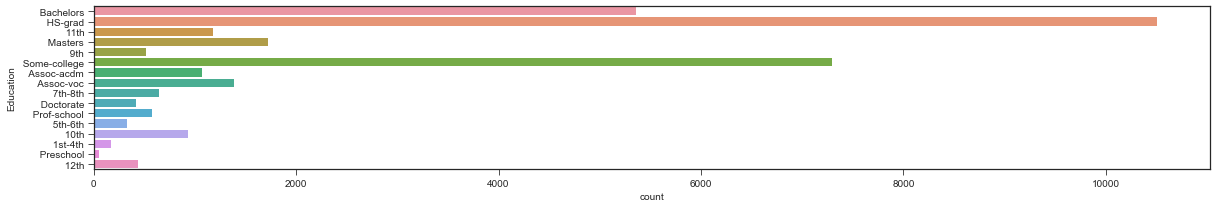

In [39]:
fig = plt.figure(figsize=(20,3))
plt.style.use('seaborn-ticks')
sns.countplot(y="Education", data=my_df)

In [ ]:
#df2 = my_df['marital-status'].replace(' Never-married', 'NotMarried')
my_df['marital-status'].replace('Never-married', 'NotMarried',inplace=True)
my_df['marital-status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
my_df['marital-status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
my_df['marital-status'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
my_df['marital-status'].replace(['Separated'], 'Separated',inplace=True)
my_df['marital-status'].replace(['Divorced'], 'Separated',inplace=True)
my_df['marital-status'].replace(['Widowed'], 'Widowed',inplace=True)

<AxesSubplot:xlabel='count', ylabel='Marital_status'>

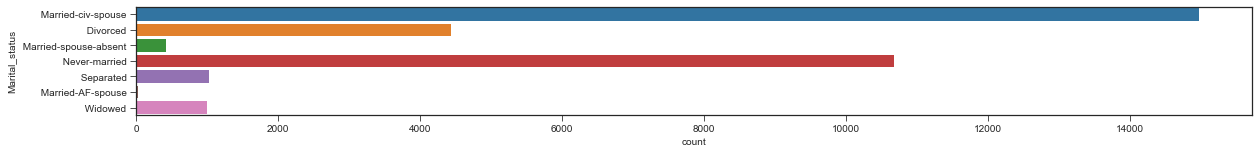

In [40]:
fig = plt.figure(figsize=(20,2))
plt.style.use('seaborn-ticks')
sns.countplot(y="Marital_status", data=my_df)

<AxesSubplot:xlabel='count', ylabel='Occupation'>

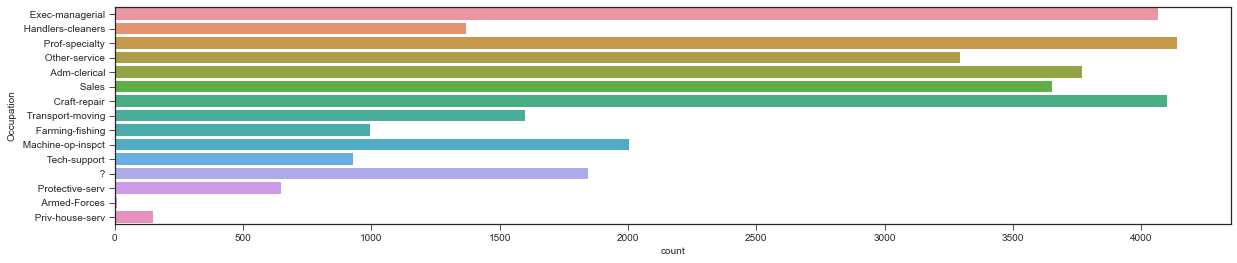

In [41]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="Occupation", data=my_df)

<AxesSubplot:xlabel='count', ylabel='Workclass'>

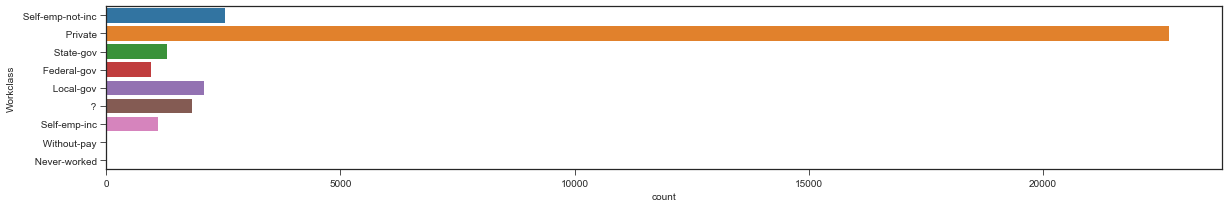

In [42]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,3)) 
sns.countplot(y="Workclass", data=my_df)

In [ ]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
#grid = sns.FacetGrid(my_df, col='predclass', row='workclass', size=2.2, aspect=1.6)
#grid.map(plt.hist, 'age', alpha=.5, bins=20)
#grid.add_legend()

In [43]:
# make the age variable discretized 
my_df['Age_bin'] = pd.cut(my_df['Age'], 20)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2589: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\User\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


<AxesSubplot:xlabel='Age'>

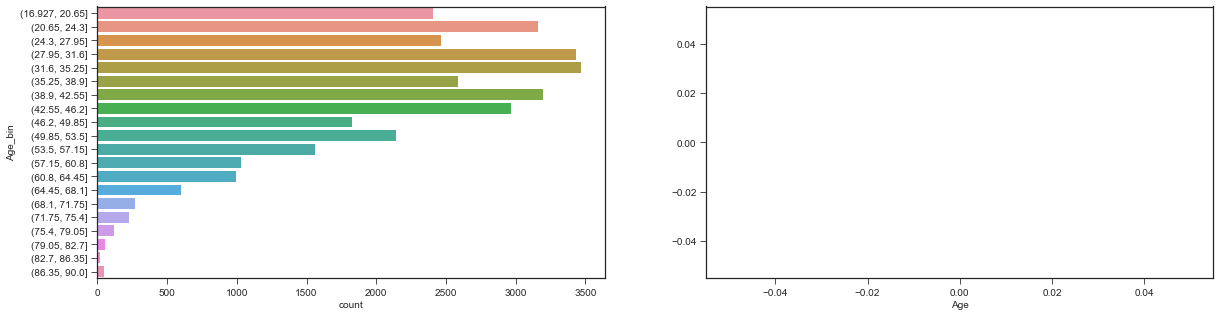

In [45]:
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="Age_bin", data=my_df)
plt.subplot(1, 2, 2)
sns.distplot(my_df[my_df['Predclass'] == '>50K']['Age'], kde_kws={"label": ">$50K"})
sns.distplot(my_df[my_df['Predclass'] == '<=50K']['Age'], kde_kws={"label": "<=$50K"})

In [46]:
my_df[['Predclass', 'Age']].groupby(['Predclass'], as_index=False).mean().sort_values(by='Age', ascending=False)

,Predclass,Age
1,>50K,44.249841
0,<=50K,36.783648


In [ ]:
plt.style.use('seaborn-whitegrid')
x, y, hue = "race", "prop", "gender"
#hue_order = ["Male", "Female"]
plt.figure(figsize=(20,5)) 
f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=my_df, ax=axes[0])

prop_df = (my_df[x]
           .groupby(my_df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])

In [47]:
# Let's use the Pandas Cut function to bin the data in equally sized buckets
my_df['Hours_per_week_bin'] = pd.cut(my_df['Hours_per_week'], 10)
my_df['Hours_per_week'] = my_df['Hours_per_week']


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2589: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.typ

(20.0, 60.0)

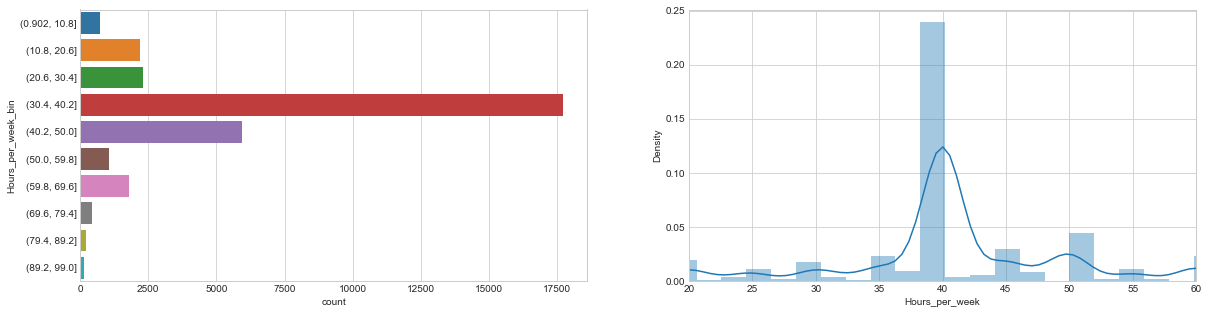

In [48]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="Hours_per_week_bin", data=my_df);
plt.subplot(1, 2, 2)
sns.distplot(my_df['Hours_per_week']);
sns.distplot(my_df[my_df['Predclass'] == '>50K']['Hours_per_week'], kde_kws={"label": ">$50K"})
sns.distplot(my_df[my_df['Predclass'] == '<=50K']['Hours_per_week'], kde_kws={"label": "<$50K"})
plt.ylim(0, None)
plt.xlim(20, 60)

C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Hours_per_week'>

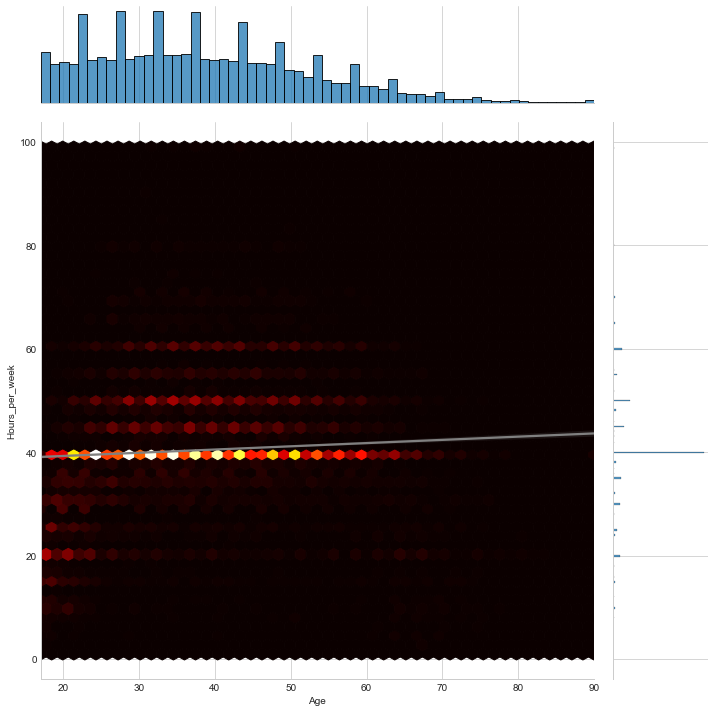

In [49]:
g = sns.jointplot(x = 'Age', 
              y = 'Hours_per_week',
              data = my_df, 
              kind = 'hex', 
              cmap= 'hot', 
              size=10)

#http://stackoverflow.com/questions/33288830/how-to-plot-regression-line-on-hexbins-with-seaborn
sns.regplot(my_df.Age, my_df['Hours_per_week'], ax=g.ax_joint, scatter=False, color='grey')

In [50]:
my_df.head()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Predclass,Age_bin,Hours_per_week_bin
0,50.0,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13.0,United-States,<=50K,"(49.85, 53.5]","(10.8, 20.6]"
1,38.0,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40.0,United-States,<=50K,"(35.25, 38.9]","(30.4, 40.2]"
2,53.0,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40.0,United-States,<=50K,"(49.85, 53.5]","(30.4, 40.2]"
3,28.0,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K,"(27.95, 31.6]","(30.4, 40.2]"
4,37.0,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40.0,United-States,<=50K,"(35.25, 38.9]","(30.4, 40.2]"


In [52]:
# Crossing Numerical Features
my_df['Age_hours'] = my_df['Age']*my_df['Hours_per_week']
my_df['Age_hours_bin'] = pd.cut(my_df['Age_hours'], 10)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2589: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\User\anaconda3\lib\site-packages\numpy\lib\histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


<AxesSubplot:xlabel='Age_hours'>

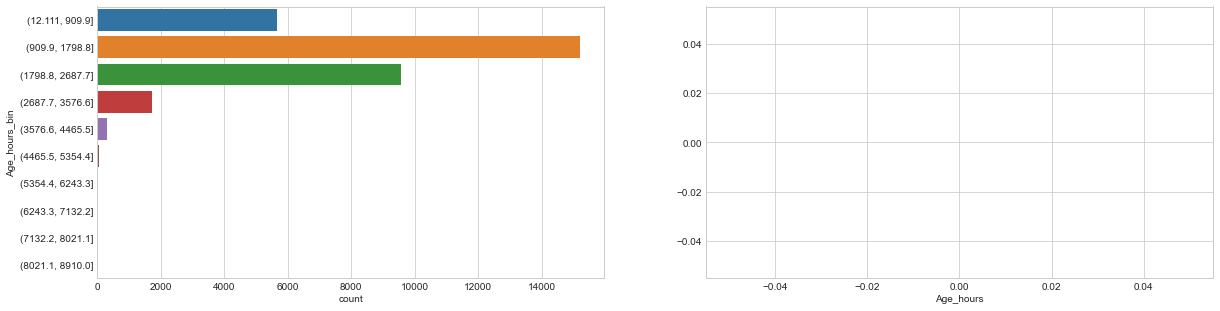

In [53]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="Age_hours_bin", data=my_df);
plt.subplot(1, 2, 2)
sns.distplot(my_df[my_df['Predclass'] == '>50K']['Age_hours'], kde_kws={"label": ">$50K"})
sns.distplot(my_df[my_df['Predclass'] == '<=50K']['Age_hours'], kde_kws={"label": "<$50K"})

C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


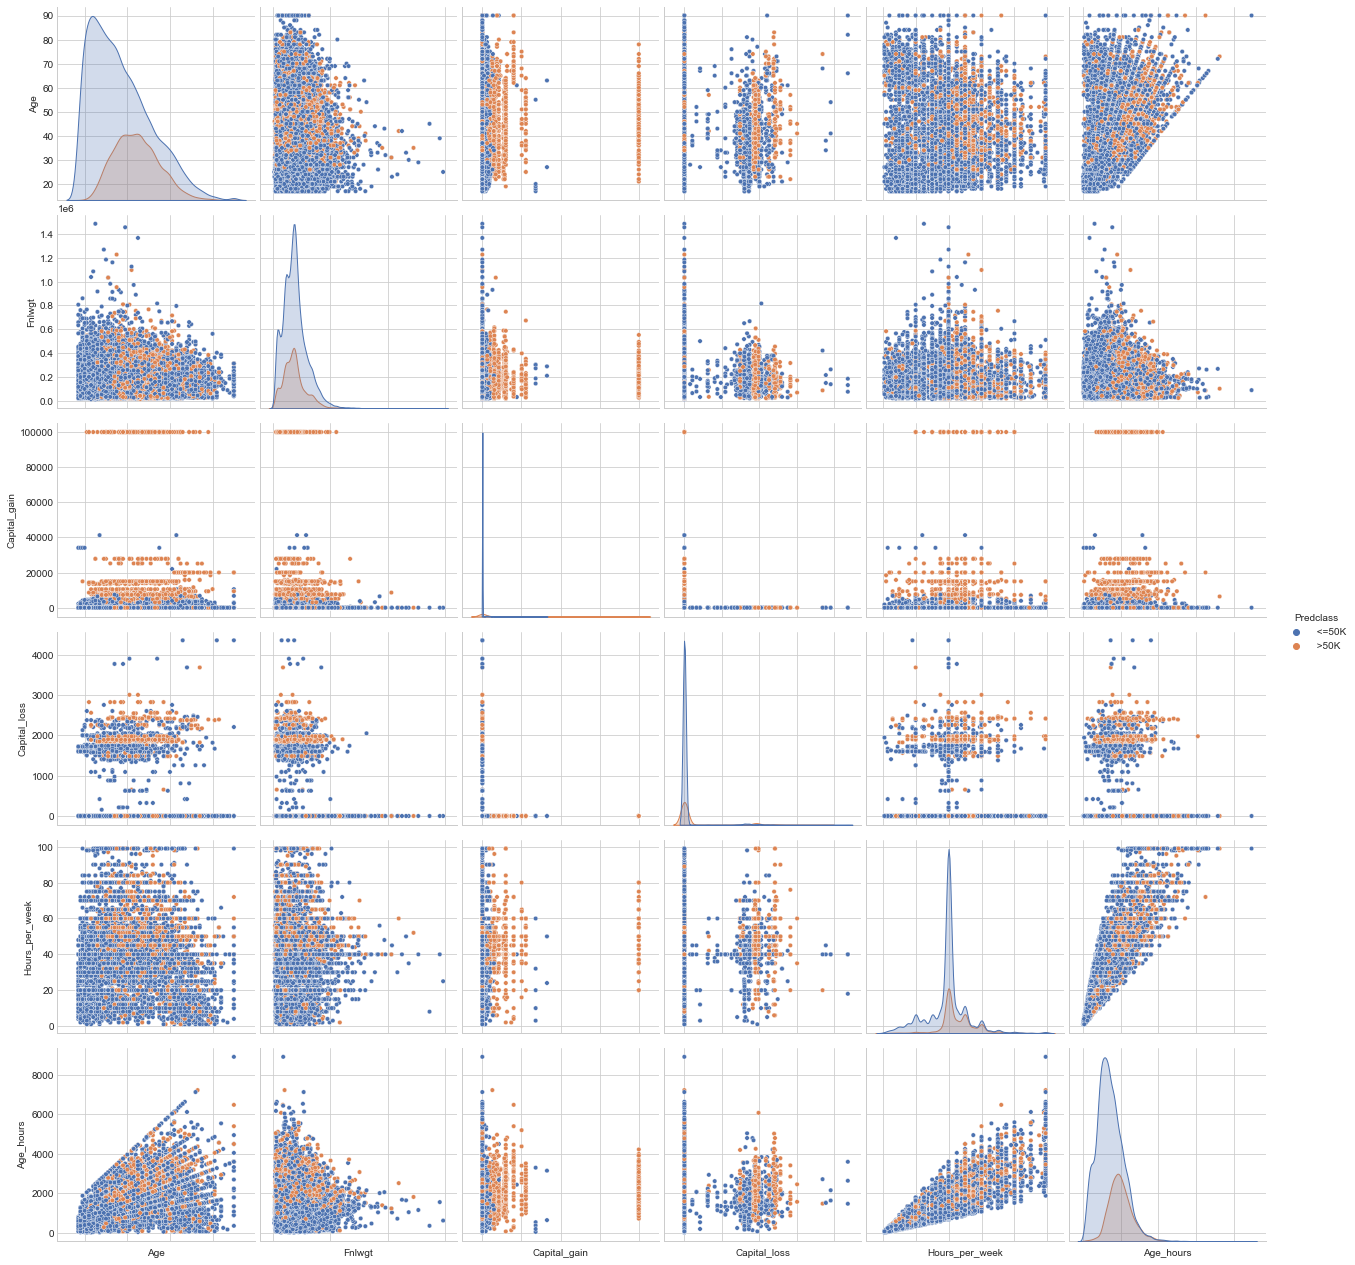

In [54]:
#pair plots of entire dataset
pp = sns.pairplot(my_df, hue = 'Predclass', palette = 'deep', 
                  size=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=20) )
pp.set(xticklabels=[])

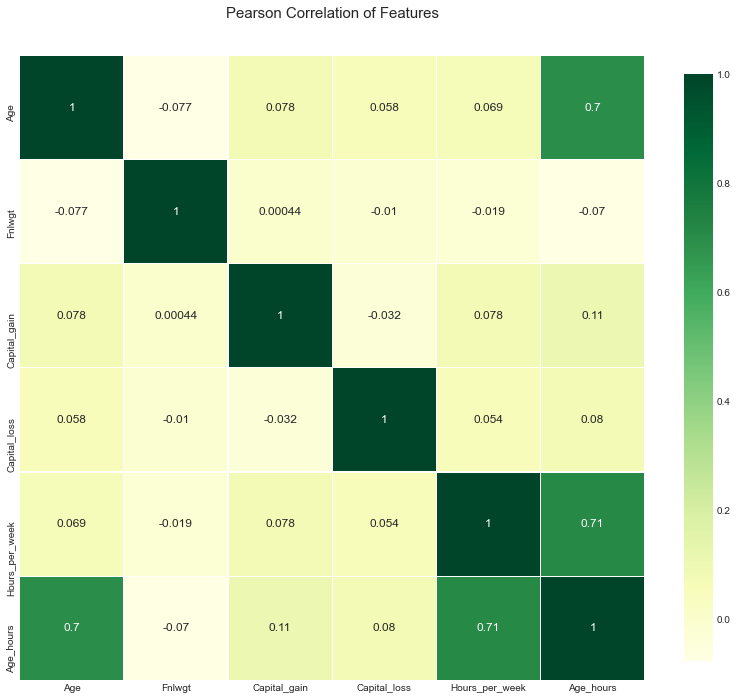

In [55]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(my_df)


In [56]:
my_df.tail()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Predclass,Age_bin,Hours_per_week_bin,Age_hours,Age_hours_bin
32555,27.0,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38.0,United-States,<=50K,"(24.3, 27.95]","(30.4, 40.2]",1026.0,"(909.9, 1798.8]"
32556,40.0,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40.0,United-States,>50K,"(38.9, 42.55]","(30.4, 40.2]",1600.0,"(909.9, 1798.8]"
32557,58.0,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40.0,United-States,<=50K,"(57.15, 60.8]","(30.4, 40.2]",2320.0,"(1798.8, 2687.7]"
32558,22.0,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20.0,United-States,<=50K,"(20.65, 24.3]","(10.8, 20.6]",440.0,"(12.111, 909.9]"
32559,52.0,Self-emp-inc,287927,HS-grad,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40.0,United-States,>50K,"(49.85, 53.5]","(30.4, 40.2]",2080.0,"(1798.8, 2687.7]"


In [60]:
import math

def plot_bivariate_bar(dataset, hue, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    dataset = dataset.select_dtypes(include=[np.object])
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, hue=hue, data=dataset)
            substrings = [s.get_text()[:10] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            
bivariate_df = my_df.loc[[:, 'Workclass', 'Education', 
           'Marital_status', 'Occupation', 
           'Relationship', 'Race','Predclass']]  

plot_bivariate_bar(bivariate_df, hue='Predclass', cols=2, width=20, height=15, hspace=0.4, wspace=0.5)

SyntaxError: invalid syntax (<ipython-input-60-425098514450>, line 17)

<AxesSubplot:xlabel='Occupation', ylabel='Age'>

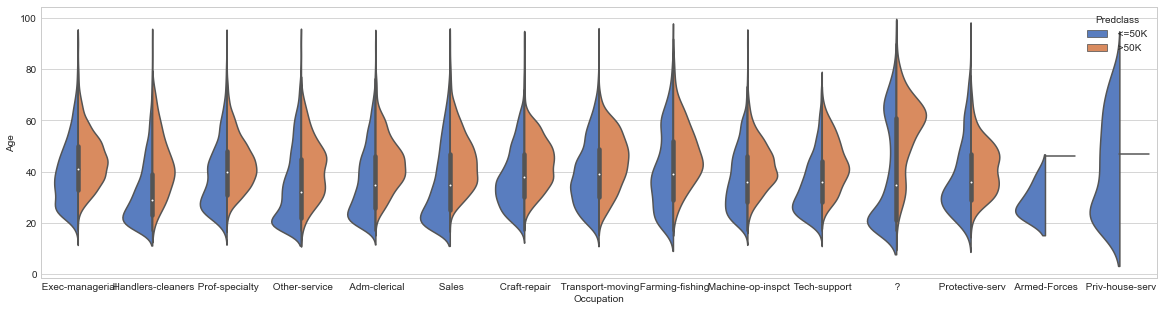

In [61]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="Occupation", y="Age", hue="Predclass",
                    data=my_df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

<AxesSubplot:xlabel='Race', ylabel='Age'>

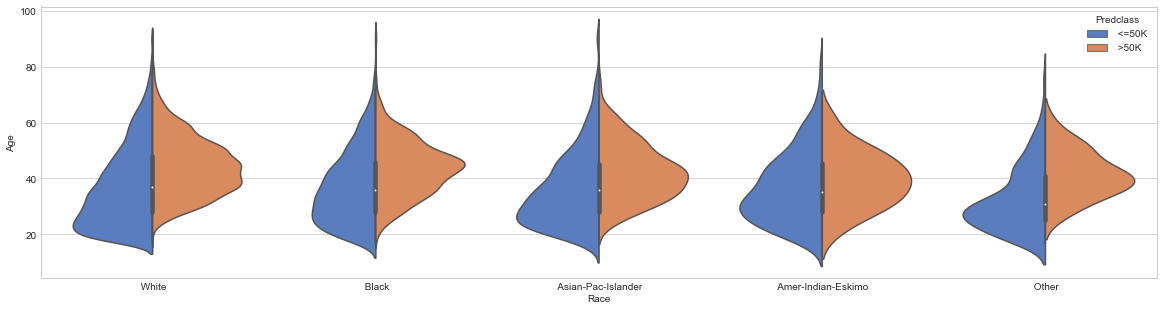

In [62]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="Race", y="Age", hue="Predclass",
                    data=my_df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

In [64]:
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA
#from pandas.tools.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import GridSearchCV


#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
#train,test=train_test_split(train_df,test_size=0.2,random_state=0,stratify=abalone_data['Sex'])

In [65]:
# Feature Selection and Encoding
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split #training and testing data split

In [66]:
my_df = my_df.apply(LabelEncoder().fit_transform)
my_df.head()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Predclass,Age_bin,Hours_per_week_bin,Age_hours,Age_hours_bin
0,33,6,2925,9,2,4,0,4,1,0,0,12,39,0,9,1,290,0
1,21,4,14085,11,0,6,1,4,1,0,0,39,39,0,5,3,620,1
2,36,4,15335,1,2,6,0,2,1,0,0,39,39,0,9,3,810,2
3,11,4,19354,9,2,10,5,2,0,0,0,39,5,0,3,3,477,1
4,20,4,17699,12,2,4,5,4,0,0,0,39,39,0,5,3,606,1


In [67]:
drop_elements = ['Education', 'Native_country', 'Predclass', 'Age_bin', 'Age_hours_bin','Hours_per_week_bin']
y = my_df["Predclass"]
X = my_df.drop(drop_elements, axis=1)
X.head()

,Age,Workclass,Fnlwgt,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Age_hours
0,33,6,2925,2,4,0,4,1,0,0,12,290
1,21,4,14085,0,6,1,4,1,0,0,39,620
2,36,4,15335,2,6,0,2,1,0,0,39,810
3,11,4,19354,2,10,5,2,0,0,0,39,477
4,20,4,17699,2,4,5,4,0,0,0,39,606


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [69]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


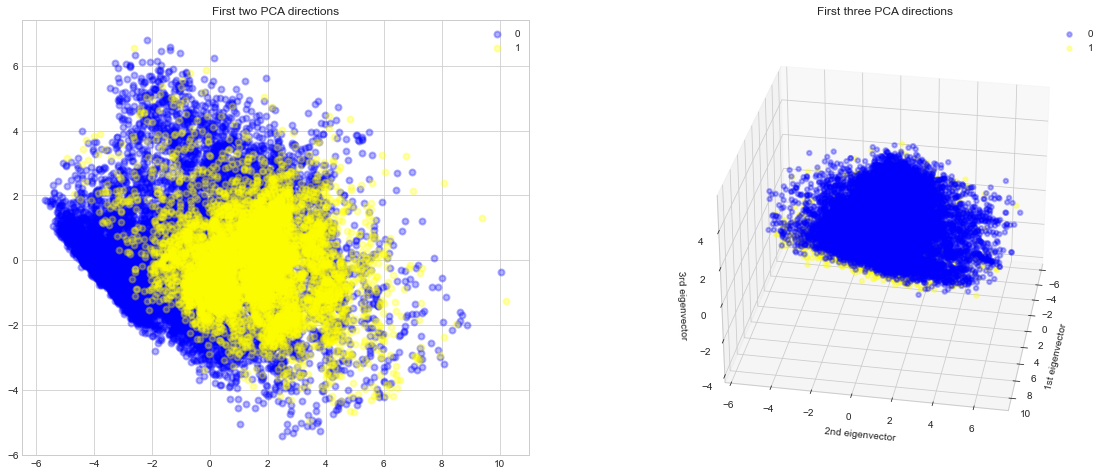

In [70]:
# PCA's components graphed in 2D and 3D
# Apply Scaling 
std_scale = preprocessing.StandardScaler().fit(my_df.drop('Predclass', axis=1))
X = std_scale.transform(my_df.drop('Predclass', axis=1))
y = my_df['Predclass']

# Formatting
target_names = [0,1]
colors = ['blue','yellow','pink']
lw = 2
alpha = 0.3
# 2 Components PCA
plt.style.use('seaborn-whitegrid')
plt.figure(2, figsize=(20, 8))

plt.subplot(1, 2, 1)
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], 
                color=color, 
                alpha=alpha, 
                lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('First two PCA directions');

# 3 Components PCA
ax = plt.subplot(1, 2, 2, projection='3d')

pca = PCA(n_components=3)
X_reduced = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    ax.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2], 
               color=color,
               alpha=alpha,
               lw=lw, 
               label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

# rotate the axes
ax.view_init(30, 10)


In [71]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
pca = PCA(n_components=None)
x_train_pca = pca.fit_transform(X_train_std)
a = pca.explained_variance_ratio_
a_running = a.cumsum()
a_running

array([0.22679865, 0.33945003, 0.43721855, 0.52531659, 0.60853785,
       0.68865288, 0.76447933, 0.8383234 , 0.90435116, 0.96530988,
       0.99791113, 1.        ])

In [72]:
## Perceptron Method
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=1, random_state=1)
ppn.fit(X_train, y_train)

Perceptron(eta0=1, random_state=1)

In [73]:
y_pred = ppn.predict(X_test)
accuracy_score(y_pred,y_test)


0.7840909090909091

In [74]:
## cross_val_score for ppn method
from sklearn.model_selection import cross_val_score
score_ppn=cross_val_score(ppn, X,y, cv=5)
score_ppn.mean()

0.7491093366093367

In [75]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
# y_pred = gaussian.predict(X_test)
score_gaussian = gaussian.score(X_test,y_test)
print('The accuracy of Gaussian Naive Bayes is', score_gaussian)

The accuracy of Gaussian Naive Bayes is 0.8014434889434889


In [77]:
# Support Vector Classifier (SVM/SVC)
from sklearn.svm import SVC
svc = SVC(gamma=0.22)
svc.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_svc = svc.score(X_test,y_test)
print('The accuracy of SVC is', score_svc)

The accuracy of SVC is 0.7652027027027027


In [83]:
svc_radical =svm.SVC(kernel='rbf',C=1,gamma=0.22)
svc_radical.fit(X_train,y_train.values.ravel())
score_svc_radical = svc_radical.score(X_test,y_test)
print('The accuracy of Radical SVC Model is', score_svc_radical)

The accuracy of Radical SVC Model is 0.7652027027027027


In [79]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('The accuracy of the Logistic Regression is', score_logreg)

The accuracy of the Logistic Regression is 0.804514742014742


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
# Random Forest Classifier
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
#y_pred = randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test,y_test)
print('The accuracy of the Random Forest Model is', score_randomforest)

The accuracy of the Random Forest Model is 0.851504914004914


In [81]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
#y_pred = knn.predict(X_test)
score_knn = knn.score(X_test,y_test)
print('The accuracy of the KNN Model is',score_knn)

The accuracy of the KNN Model is 0.7630528255528255


In [82]:
### cross validation
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Naive Bayes','Linear Svm','Radial Svm','Logistic Regression','Decision Tree','KNN','Random Forest']
models=[GaussianNB(), svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors=9),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
models_dataframe=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
models_dataframe

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


,CV Mean,Std
Naive Bayes,0.798127,0.005566
Linear Svm,0.800584,0.005566
Radial Svm,0.829699,0.005708
Logistic Regression,0.803778,0.003385
Decision Tree,0.808845,0.004470
KNN,0.824816,0.005561
Random Forest,0.852488,0.004363


In [3]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters={'n_estimetors' :[200,700,500,100],
            'max_features' :['auto', 'sqrt', 'log2'],
            'max_depth' :[4,5,6,7,8] 
            'criterion' :['gini', 'entropy']}
    

In [ ]:
GCV=GridSearchCv(RandomForestClassifier(),parameters,cv=5)

In [ ]:
GCV.fit(x_train,y_train)

In [ ]:
GCV.best_parameters_

In [ ]:
mod=RandomForestClasifier(criterion='',)
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(acccuracy_acore(y_test,pred)*100)

In [ ]:
import joblib
joblib.dump(model,"project.pkl")

In [ ]:
#GridSearch
model = RandomForestClassifier() 
parameters = {'n_estimators': [500], 'max_features': ['log2', 'sqrt','auto'],
#The number of features to consider when looking for the best split 'max_depth': [50,80,100,150], 'min_samples_split': [5,7,9,11], } grid_obj = GridSearchCV(model, parameters, scoring="neg_log_loss",n_jobs=4,cv = 5) grid_obj = grid_obj.fit(X_train,y_train) model_params = grid_obj.best_params_ model_params
